In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the datasets
file_paths = {
    'AAPL': '/content/drive/My Drive/Colab Notebooks/AAPL_data.csv',
    'META': '/content/drive/My Drive/Colab Notebooks/META_data (1).csv',
    'IBM': '/content/drive/My Drive/Colab Notebooks/IBM_data (1).csv',
    'GOOGL': '/content/drive/My Drive/Colab Notebooks/GOOGL_data.csv',
    'AMZN': '/content/drive/My Drive/Colab Notebooks/AMZN_data.csv'
}

# Read the data into DataFrames
data_frames = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Display the first few rows of each DataFrame to understand the structure and identify potential issues
data_overview = {name: df.head() for name, df in data_frames.items()}
data_overview

{'AAPL':          Date      Open      High       Low     Close  Adj Close     Volume
 0  2004-04-26  0.492500  0.493571  0.482143  0.484464   0.410147  231128800
 1  2004-04-27  0.486429  0.490000  0.476607  0.481071   0.407275  283864000
 2  2004-04-28  0.478929  0.482321  0.470357  0.472321   0.399867  231168000
 3  2004-04-29  0.472321  0.482143  0.463929  0.478036   0.404705  460790400
 4  2004-04-30  0.476964  0.481429  0.455179  0.460357   0.389738  466502400,
 'META':          Date       Open       High        Low      Close  Adj Close  \
 0  2012-05-18  42.049999  45.000000  38.000000  38.230000  38.189480   
 1  2012-05-21  36.529999  36.660000  33.000000  34.029999  33.993931   
 2  2012-05-22  32.610001  33.590000  30.940001  31.000000  30.967144   
 3  2012-05-23  31.370001  32.500000  31.360001  32.000000  31.966084   
 4  2012-05-24  32.950001  33.209999  31.770000  33.029999  32.994991   
 
       Volume  
 0  573576400  
 1  168192700  
 2  101786600  
 3   73600000  
 

In [ ]:
# Convert 'Date' to datetime and check for missing values and duplicates

for df in data_frames.values():
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"Missing Values:\n{df.isnull().sum()}\n")
    print(f"Duplicate Rows: {df.duplicated().sum()}\n")

# Print data types to confirm 'Date' conversion
data_types = {name: df.dtypes for name, df in data_frames.items()}
data_types

Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Duplicate Rows: 0

Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Duplicate Rows: 0

Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Duplicate Rows: 0

Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Duplicate Rows: 0

Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Duplicate Rows: 0



{'AAPL': Date         datetime64[ns]
 Open                float64
 High                float64
 Low                 float64
 Close               float64
 Adj Close           float64
 Volume                int64
 dtype: object,
 'META': Date         datetime64[ns]
 Open                float64
 High                float64
 Low                 float64
 Close               float64
 Adj Close           float64
 Volume                int64
 dtype: object,
 'IBM': Date         datetime64[ns]
 Open                float64
 High                float64
 Low                 float64
 Close               float64
 Adj Close           float64
 Volume                int64
 dtype: object,
 'GOOGL': Date         datetime64[ns]
 Open                float64
 High                float64
 Low                 float64
 Close               float64
 Adj Close           float64
 Volume                int64
 dtype: object,
 'AMZN': Date         datetime64[ns]
 Open                float64
 High                float

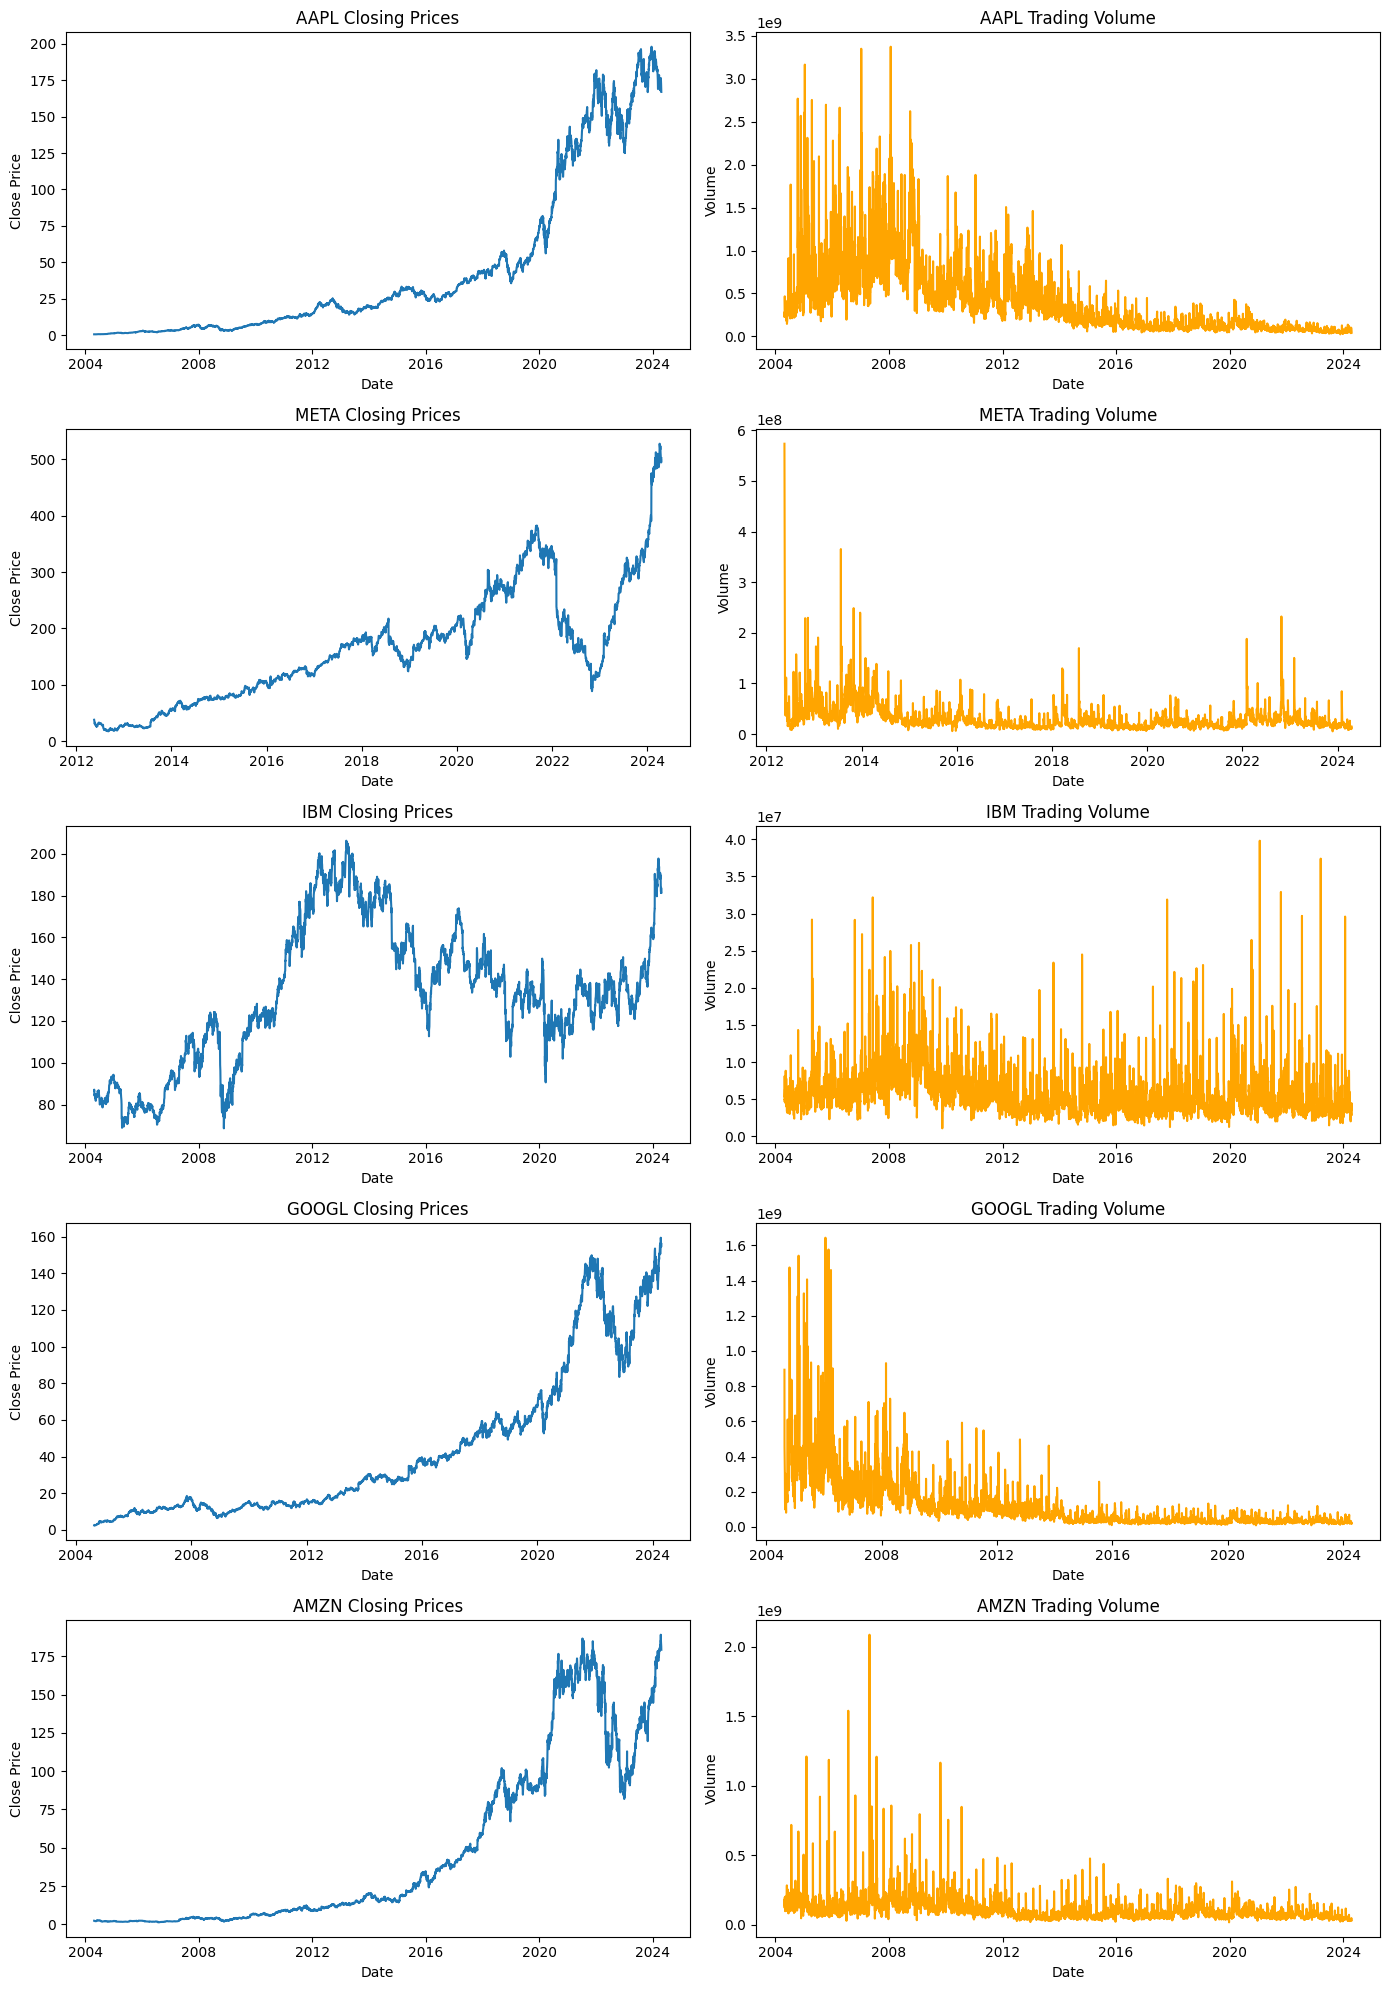

In [ ]:
import matplotlib.pyplot as plt

# Setting up the figure and axes for plotting
fig, axs = plt.subplots(5, 2, figsize=(14, 20))

# Iterate over each company and plot
for (name, df), row_axes in zip(data_frames.items(), axs):
    # Plotting closing prices
    row_axes[0].plot(df['Date'], df['Close'])
    row_axes[0].set_title(f'{name} Closing Prices')
    row_axes[0].set_xlabel('Date')
    row_axes[0].set_ylabel('Close Price')

    # Plotting volume
    row_axes[1].plot(df['Date'], df['Volume'], color='orange')
    row_axes[1].set_title(f'{name} Trading Volume')
    row_axes[1].set_xlabel('Date')
    row_axes[1].set_ylabel('Volume')

plt.tight_layout()
plt.show()


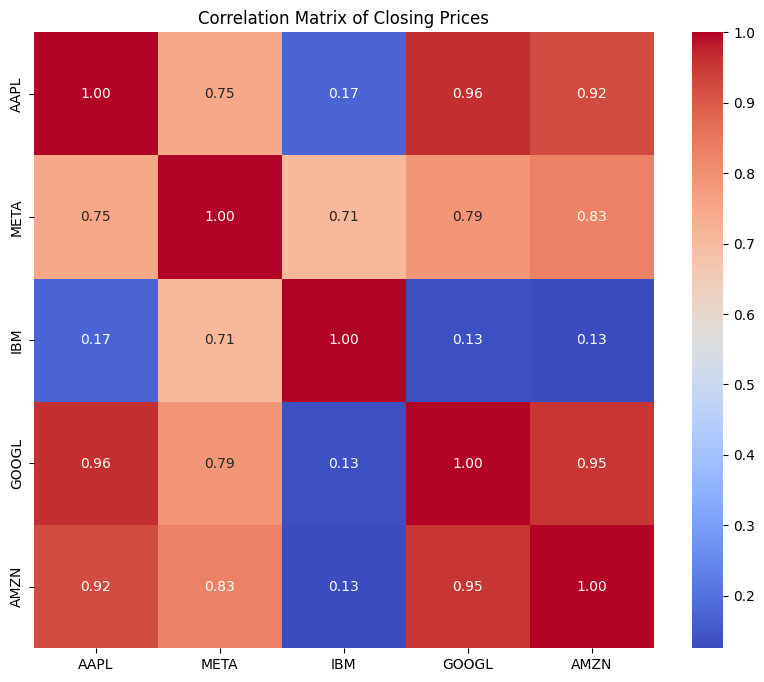

In [ ]:
import seaborn as sns

# Create a DataFrame for closing prices of all stocks
closing_prices = pd.DataFrame({
    name: df['Close'] for name, df in data_frames.items()
})

# Calculate correlation matrix
corr_matrix = closing_prices.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Closing Prices')
plt.show()


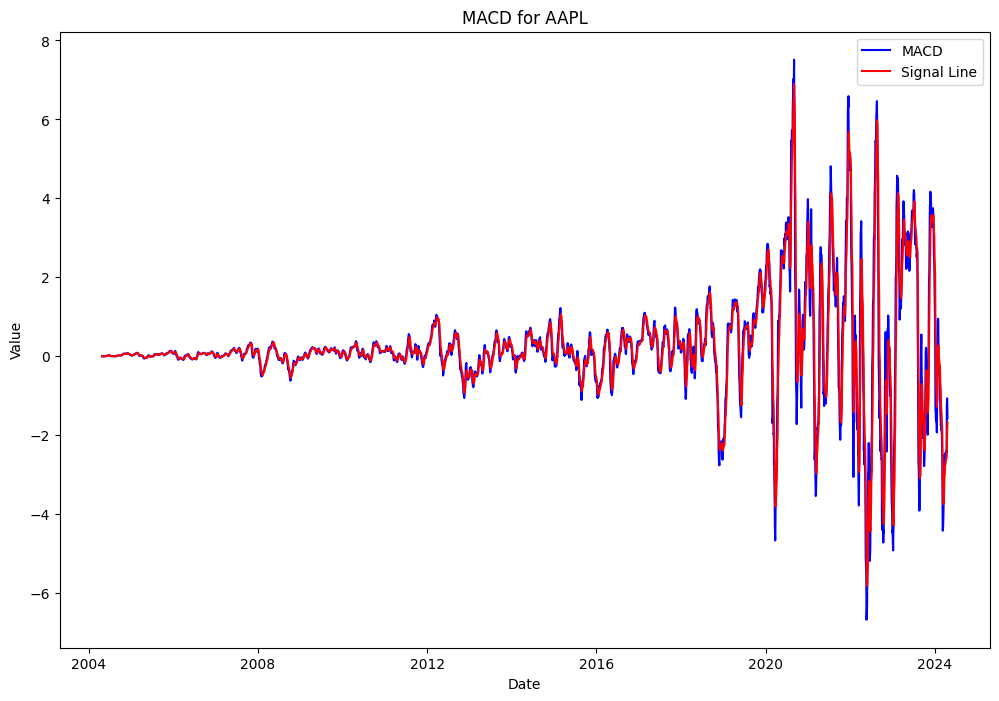

In [ ]:
# Adding MACD to each DataFrame
for name, df in data_frames.items():
    # Short term exponential moving average (EMA)
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    # Long term exponential moving average (EMA)
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    # MACD line
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    # Signal line
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Plotting MACD for Apple as an example
plt.figure(figsize=(12, 8))
plt.plot(data_frames['AAPL']['Date'], data_frames['AAPL']['MACD'], label='MACD', color='blue')
plt.plot(data_frames['AAPL']['Date'], data_frames['AAPL']['Signal_Line'], label='Signal Line', color='red')
plt.legend()
plt.title('MACD for AAPL')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


In [ ]:
import plotly.express as px

# Interactive plot for Apple's Closing Prices and Volume
fig = px.line(data_frames['AAPL'], x='Date', y='Close', title='Interactive Plot of AAPL Closing Prices')
fig.update_traces(mode='lines+markers')
fig.show()

# Interactive plot for Volume
fig = px.line(data_frames['AAPL'], x='Date', y='Volume', title='Interactive Plot of AAPL Trading Volume')
fig.update_traces(mode='lines+markers')
fig.show()


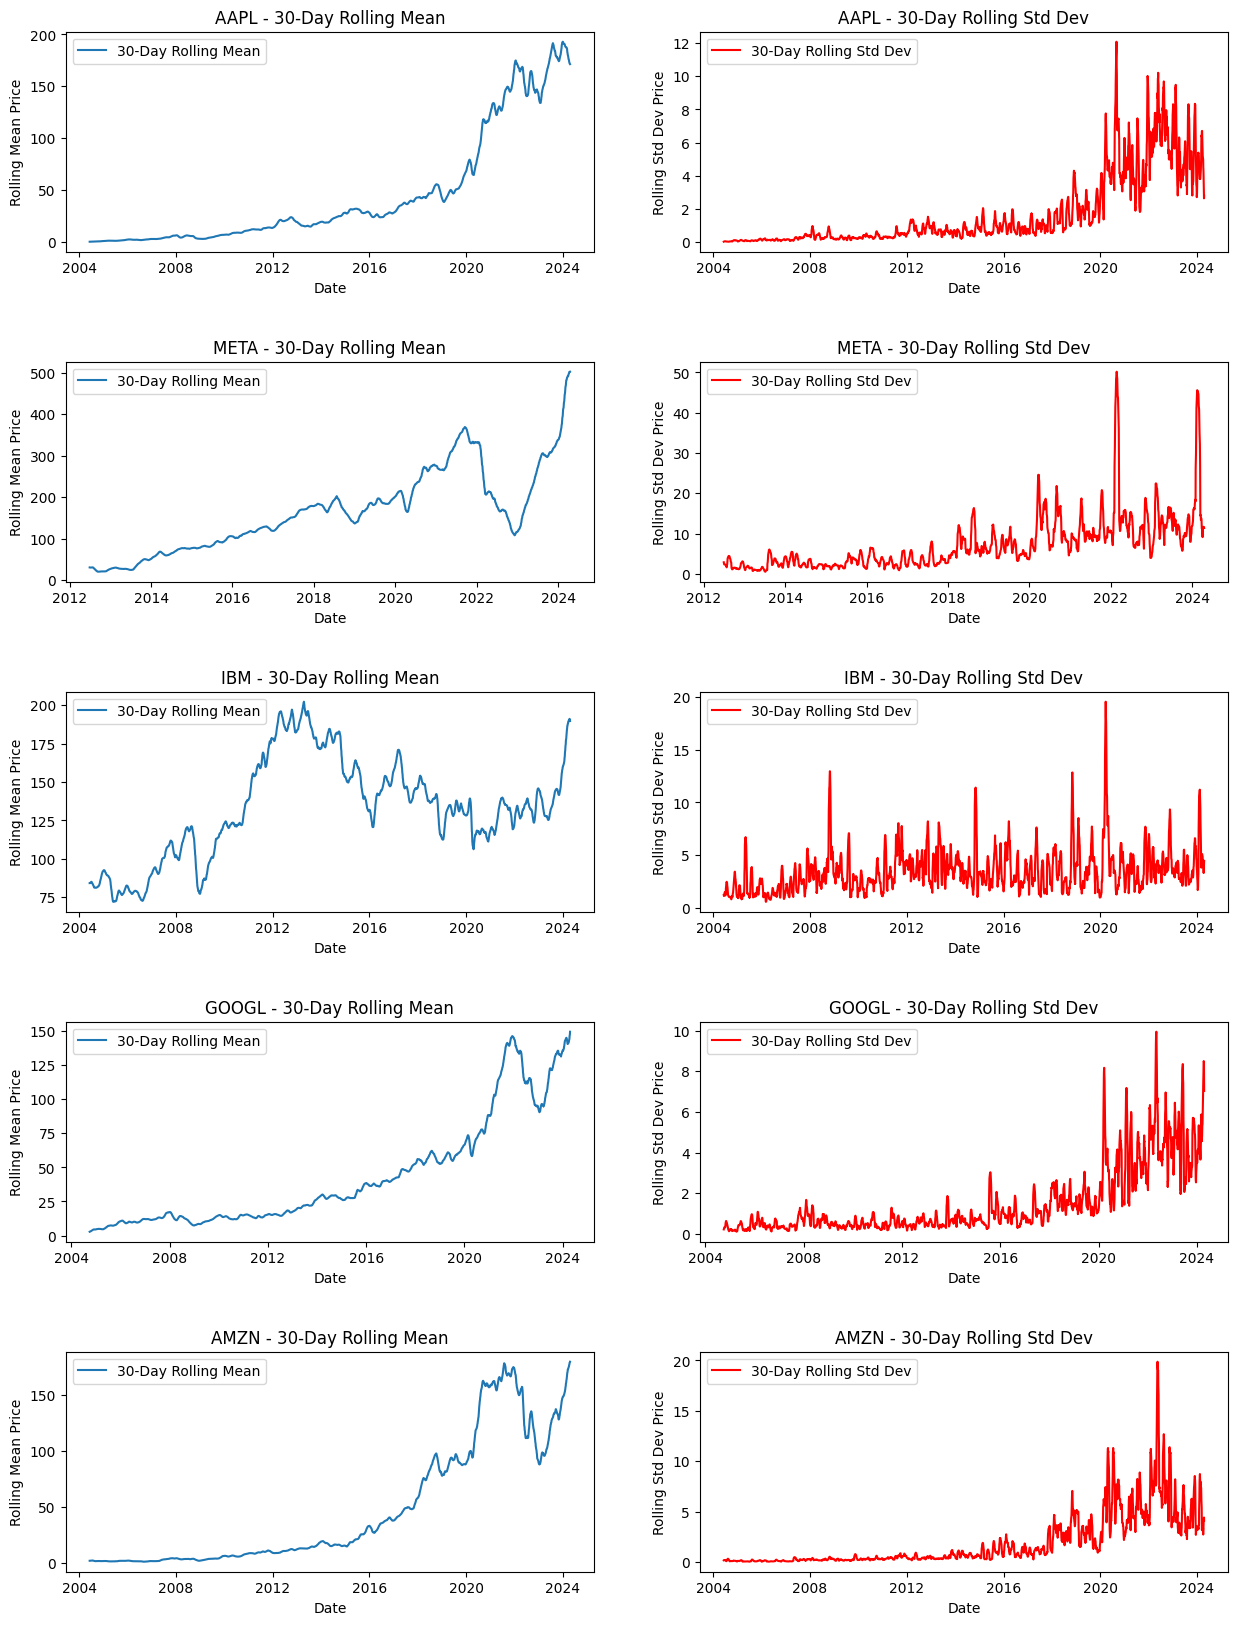

In [ ]:
# Plotting Rolling Statistics for all companies
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

for (name, df), (ax1, ax2) in zip(data_frames.items(), axs):
    # Calculate rolling mean and standard deviation
    df['Rolling_Mean_30'] = df['Close'].rolling(window=30).mean()
    df['Rolling_Std_30'] = df['Close'].rolling(window=30).std()

    # Plot rolling mean
    ax1.plot(df['Date'], df['Rolling_Mean_30'], label='30-Day Rolling Mean')
    ax1.set_title(f'{name} - 30-Day Rolling Mean')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Rolling Mean Price')

    # Plot rolling standard deviation
    ax2.plot(df['Date'], df['Rolling_Std_30'], color='red', label='30-Day Rolling Std Dev')
    ax2.set_title(f'{name} - 30-Day Rolling Std Dev')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Rolling Std Dev Price')

    ax1.legend()
    ax2.legend()

plt.show()


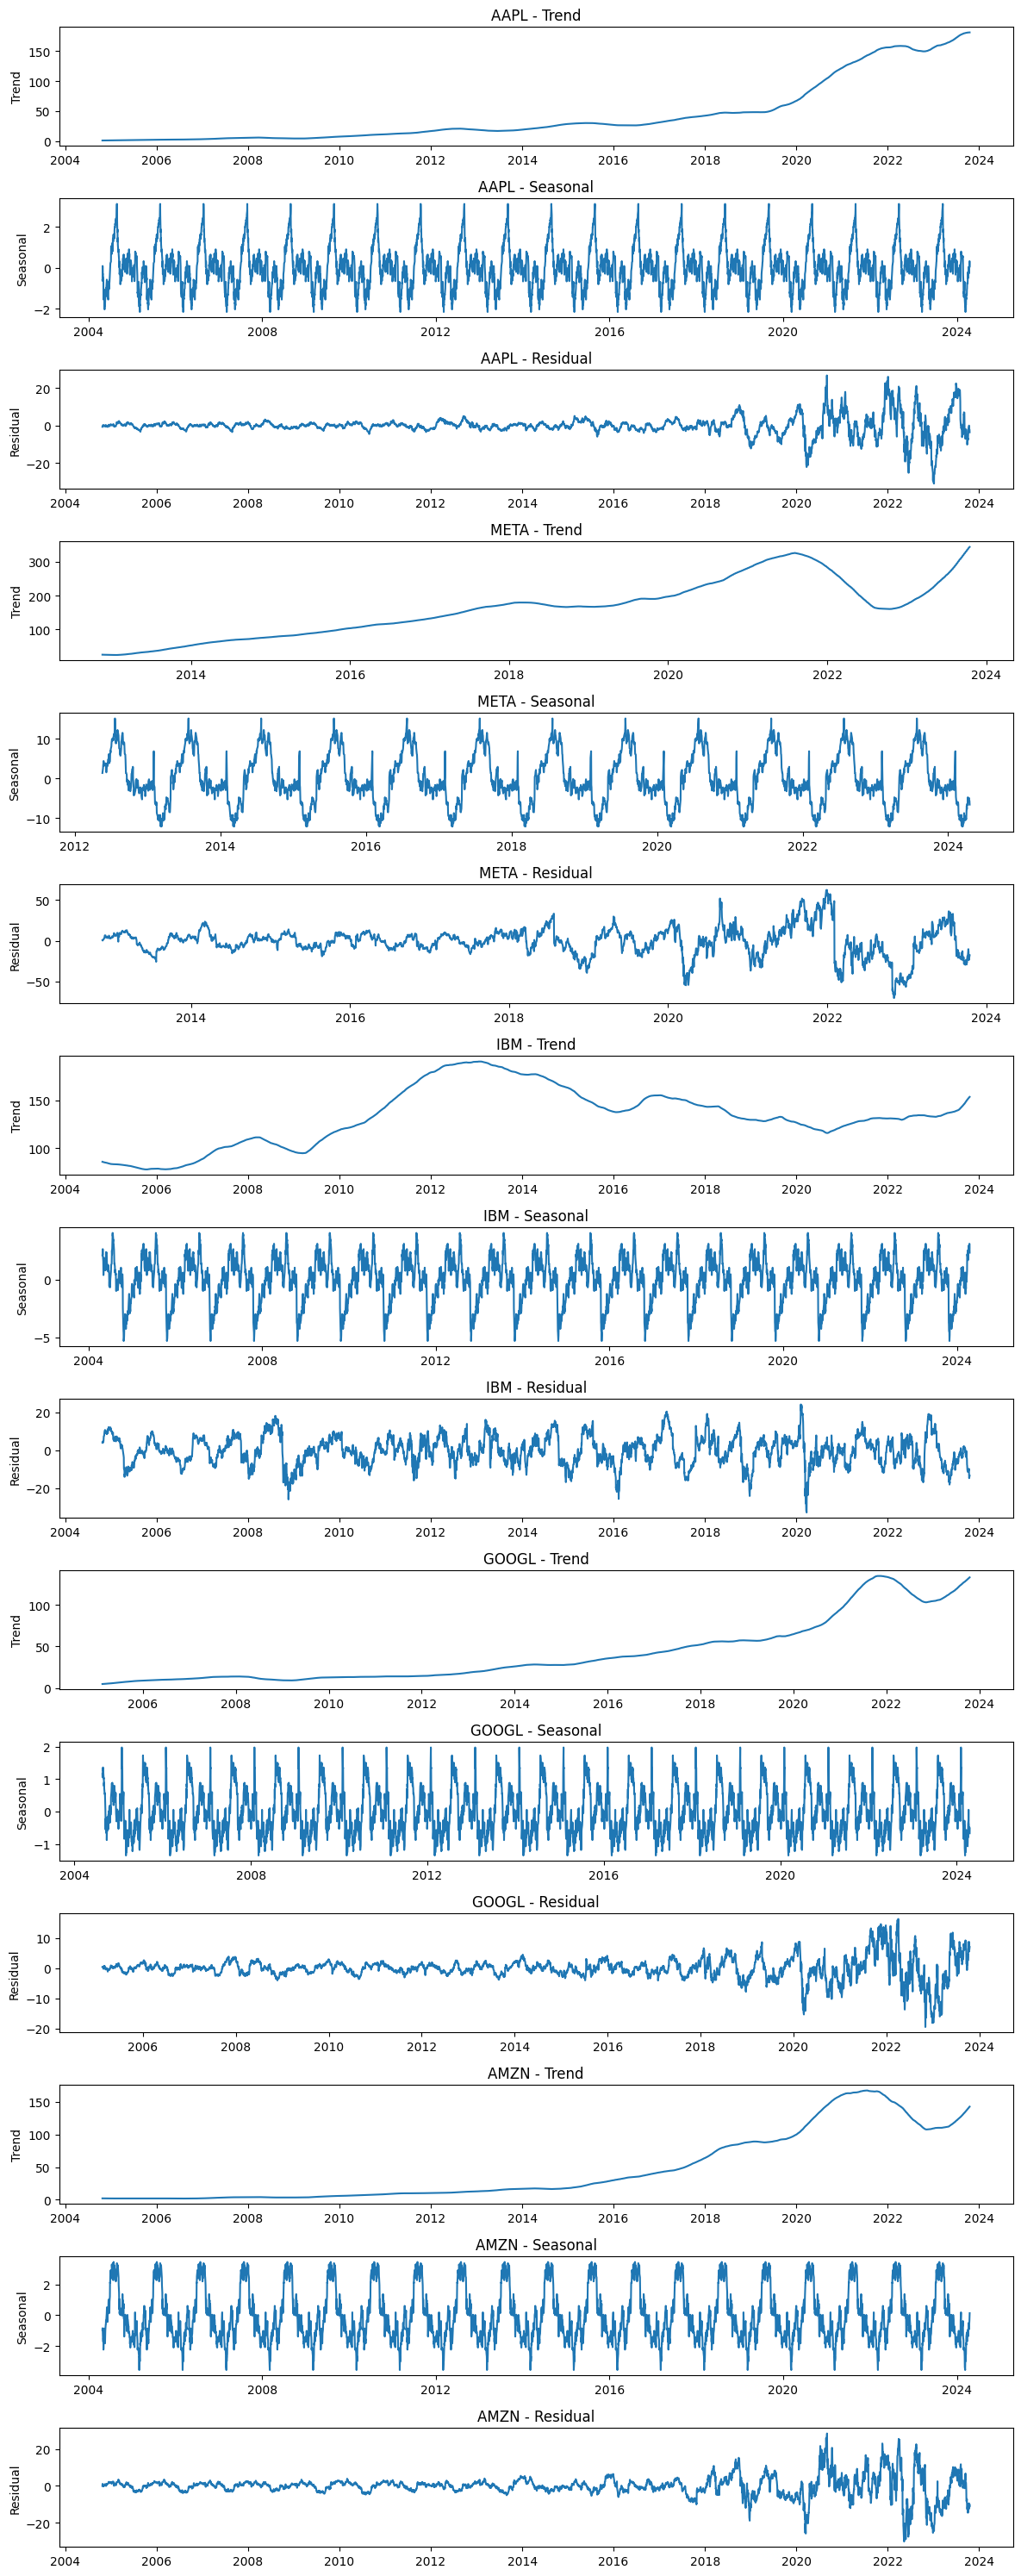

In [ ]:
import matplotlib.pyplot as plt

# Define a large figure to accommodate all subplots
fig, axs = plt.subplots(15, 1, figsize=(12, 30))  # 3 plots per company, 5 companies
fig.subplots_adjust(hspace=0.5)

for i, (name, df) in enumerate(data_frames.items()):
    # Perform seasonal decomposition
    result = seasonal_decompose(df['Close'], model='additive', period=252)  # 252 trading days in a year

    # Plotting trend
    axs[3*i].plot(df['Date'], result.trend)
    axs[3*i].set_title(f'{name} - Trend')
    axs[3*i].set_ylabel('Trend')

    # Plotting seasonal
    axs[3*i+1].plot(df['Date'], result.seasonal)
    axs[3*i+1].set_title(f'{name} - Seasonal')
    axs[3*i+1].set_ylabel('Seasonal')

    # Plotting residual
    axs[3*i+2].plot(df['Date'], result.resid)
    axs[3*i+2].set_title(f'{name} - Residual')
    axs[3*i+2].set_ylabel('Residual')

plt.tight_layout()
plt.show()


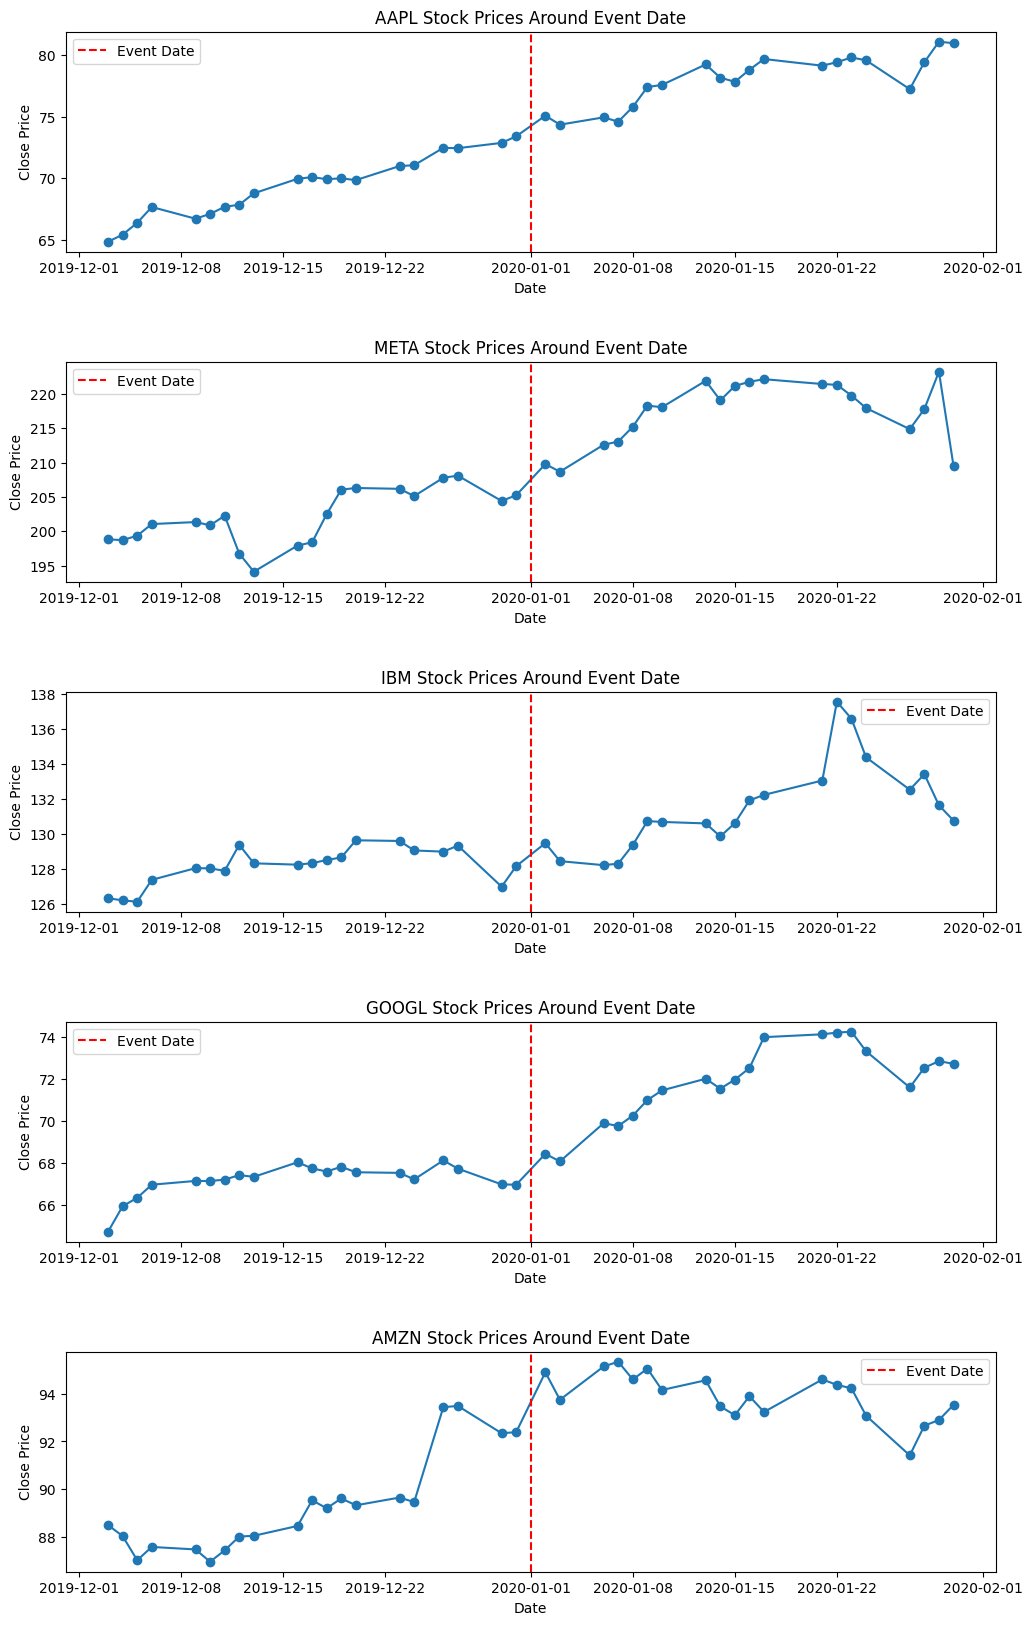

In [ ]:
# Define an event date and create a window around the event
event_date = pd.Timestamp('2020-01-01')
pre_post_days = 30

# Plotting Event Study for all companies
fig, axs = plt.subplots(5, 1, figsize=(12, 20))
fig.subplots_adjust(hspace=0.5)

for (name, df), ax in zip(data_frames.items(), axs):
    event_window = df[(df['Date'] > (event_date - pd.Timedelta(days=pre_post_days))) &
                      (df['Date'] < (event_date + pd.Timedelta(days=pre_post_days)))]

    ax.plot(event_window['Date'], event_window['Close'], marker='o', linestyle='-')
    ax.axvline(x=event_date, color='red', linestyle='--', label='Event Date')
    ax.set_title(f'{name} Stock Prices Around Event Date')
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.legend()

plt.show()

In [ ]:
# Adding new features: Moving Averages, Daily Returns, and Volatility (30-day standard deviation of daily returns)

for name, df in data_frames.items():
    # Moving averages with windows of 10 and 30 days
    df['MA_10'] = df['Close'].rolling(window=10).mean()
    df['MA_30'] = df['Close'].rolling(window=30).mean()

    # Daily returns (percentage)
    df['Daily_Return'] = df['Close'].pct_change() * 100

    # Volatility (30-day rolling standard deviation of daily returns)
    df['Volatility'] = df['Daily_Return'].rolling(window=30).std()

# Display the data with new features for the Apple stock as an example
data_frames['AAPL'].head(35)


,Date,Open,High,Low,Close,Adj Close,Volume,EMA_12,EMA_26,MACD,Signal_Line,Rolling_Mean_30,Rolling_Std_30,MA_10,MA_30,Daily_Return,Volatility
0,2004-04-26,0.492500,0.493571,0.482143,0.484464,0.410147,231128800,0.484464,0.484464,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-04-27,0.486429,0.490000,0.476607,0.481071,0.407275,283864000,0.483942,0.484213,-0.000271,-0.000054,NaN,NaN,NaN,NaN,-0.700360,NaN
2,2004-04-28,0.478929,0.482321,0.470357,0.472321,0.399867,231168000,0.482154,0.483332,-0.001178,-0.000279,NaN,NaN,NaN,NaN,-1.818857,NaN
3,2004-04-29,0.472321,0.482143,0.463929,0.478036,0.404705,460790400,0.481521,0.482940,-0.001419,-0.000507,NaN,NaN,NaN,NaN,1.209979,NaN
4,2004-04-30,0.476964,0.481429,0.455179,0.460357,0.389738,466502400,0.478265,0.481267,-0.003002,-0.001006,NaN,NaN,NaN,NaN,-3.698252,NaN
5,2004-05-03,0.464286,0.470179,0.459643,0.465536,0.394122,297634400,0.476306,0.480101,-0.003795,-0.001564,NaN,NaN,NaN,NaN,1.124994,NaN
6,2004-05-04,0.463750,0.474107,0.455357,0.466786,0.395181,279983200,0.474842,0.479115,-0.004273,-0.002106,NaN,NaN,NaN,NaN,0.268507,NaN
7,2004-05-05,0.467857,0.477679,0.463571,0.475893,0.402891,238106400,0.475003,0.478876,-0.003873,-0.002459,NaN,NaN,NaN,NaN,1.951000,NaN
8,2004-05-06,0.471429,0.477679,0.462500,0.474643,0.401832,263558400,0.474948,0.478563,-0.003615,-0.002690,NaN,NaN,NaN,NaN,-0.262664,NaN
9,2004-05-07,0.474107,0.492321,0.474107,0.476250,0.403193,419036800,0.475148,0.478392,-0.003243,-0.002801,NaN,NaN,0.473536,NaN,0.338570,NaN


In [ ]:
data_frames['AMZN'].head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,EMA_12,EMA_26,MACD,Signal_Line,Rolling_Mean_30,Rolling_Std_30,MA_10,MA_30,Daily_Return,Volatility
0,2004-04-26,2.3165,2.3880,2.3075,2.3625,2.3625,146284000,2.362500,2.362500,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-04-27,2.3795,2.4400,2.3395,2.4000,2.4000,179674000,2.368269,2.365278,0.002991,0.000598,NaN,NaN,NaN,NaN,1.587308,NaN
2,2004-04-28,2.3810,2.4175,2.3320,2.3485,2.3485,122552000,2.365228,2.364035,0.001193,0.000717,NaN,NaN,NaN,NaN,-2.145837,NaN
3,2004-04-29,2.3450,2.3540,2.2755,2.3095,2.3095,180714000,2.356654,2.359995,-0.003341,-0.000094,NaN,NaN,NaN,NaN,-1.660636,NaN
4,2004-04-30,2.3030,2.3175,2.1655,2.1800,2.1800,196826000,2.329477,2.346662,-0.017186,-0.003513,NaN,NaN,NaN,NaN,-5.607271,NaN
5,2004-05-03,2.1740,2.2575,2.1705,2.2205,2.2205,138468000,2.312711,2.337317,-0.024606,-0.007731,NaN,NaN,NaN,NaN,1.857795,NaN
6,2004-05-04,2.2205,2.2285,2.1850,2.1975,2.1975,145778000,2.294986,2.326960,-0.031974,-0.012580,NaN,NaN,NaN,NaN,-1.035803,NaN
7,2004-05-05,2.1990,2.2525,2.1975,2.2130,2.2130,97810000,2.282373,2.318519,-0.036146,-0.017293,NaN,NaN,NaN,NaN,0.705350,NaN
8,2004-05-06,2.1795,2.2125,2.1385,2.1570,2.1570,156368000,2.263085,2.306554,-0.043469,-0.022528,NaN,NaN,NaN,NaN,-2.530501,NaN
9,2004-05-07,2.1480,2.2090,2.0840,2.0950,2.0950,185852000,2.237226,2.290884,-0.053658,-0.028754,NaN,NaN,2.24835,NaN,-2.874364,NaN


In [ ]:
for df in data_frames.values():
    df['MA_10'].fillna(method='ffill', inplace=True)
    df['MA_30'].fillna(method='ffill', inplace=True)
    df['EMA_12'].fillna(method='ffill', inplace=True)
    df['EMA_26'].fillna(method='ffill', inplace=True)
    df['MACD'].fillna(method='ffill', inplace=True)
    df['Signal_Line'].fillna(method='ffill', inplace=True)

In [ ]:
for name, df in data_frames.items():
    print(f"{name} - Remaining NaN values after filling:")
    print(df[['MA_10', 'MA_30', 'EMA_12', 'EMA_26', 'MACD', 'Signal_Line']].isnull().sum(), '\n')

AAPL - Remaining NaN values after filling:
MA_10           9
MA_30          29
EMA_12          0
EMA_26          0
MACD            0
Signal_Line     0
dtype: int64 

META - Remaining NaN values after filling:
MA_10           9
MA_30          29
EMA_12          0
EMA_26          0
MACD            0
Signal_Line     0
dtype: int64 

IBM - Remaining NaN values after filling:
MA_10           9
MA_30          29
EMA_12          0
EMA_26          0
MACD            0
Signal_Line     0
dtype: int64 

GOOGL - Remaining NaN values after filling:
MA_10           9
MA_30          29
EMA_12          0
EMA_26          0
MACD            0
Signal_Line     0
dtype: int64 

AMZN - Remaining NaN values after filling:
MA_10           9
MA_30          29
EMA_12          0
EMA_26          0
MACD            0
Signal_Line     0
dtype: int64 



In [ ]:
!pip install statsmodels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

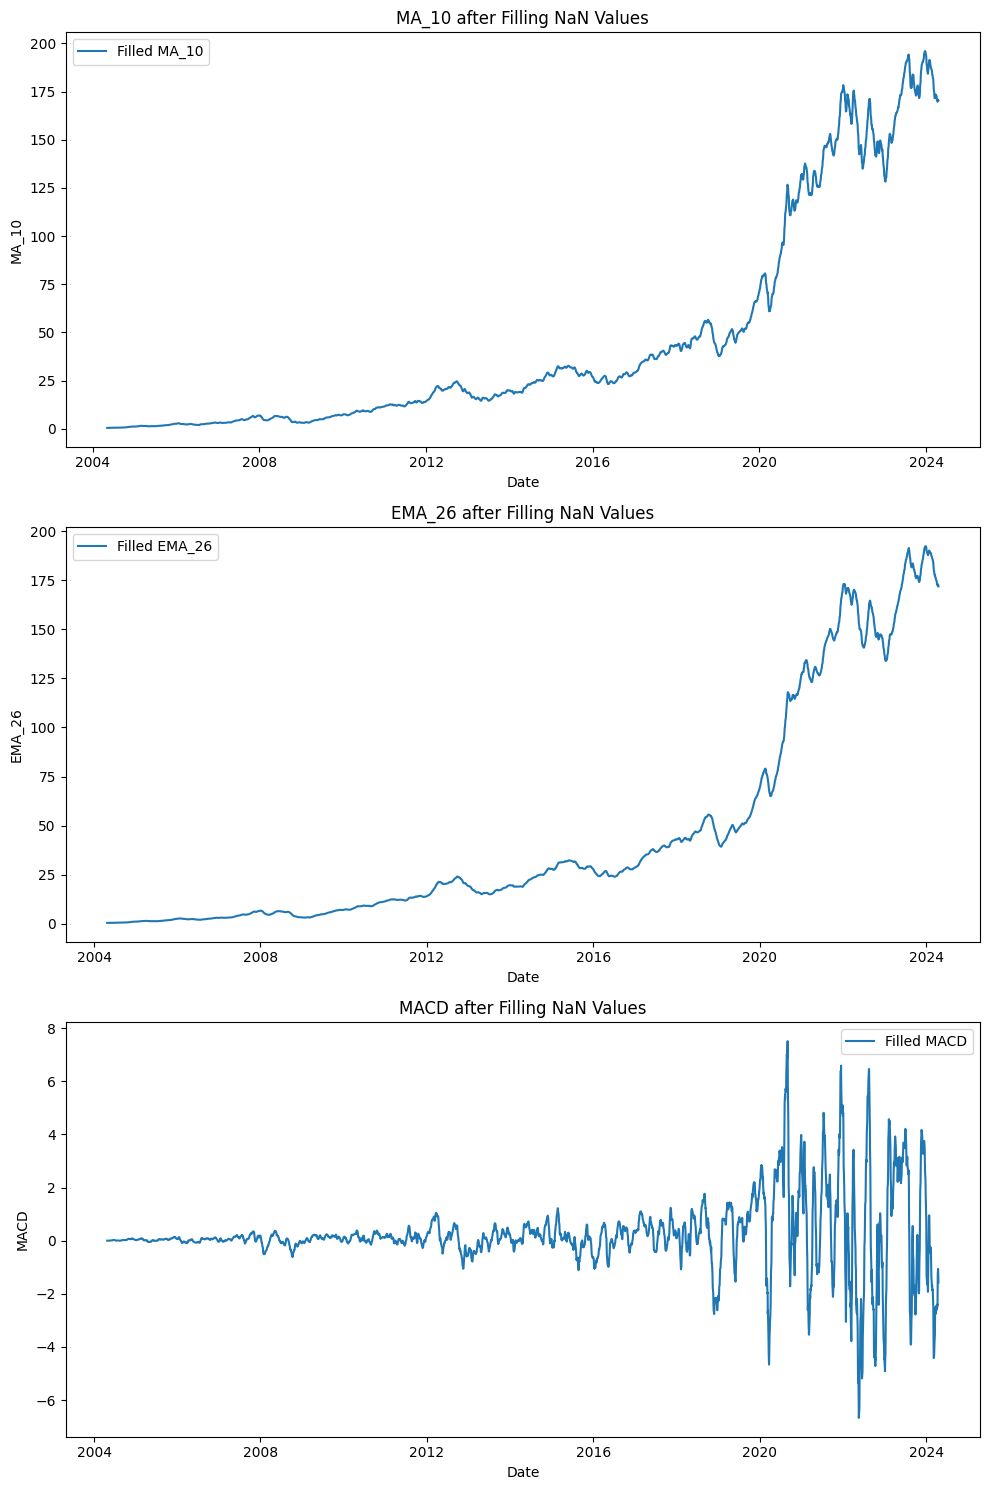

In [ ]:
import matplotlib.pyplot as plt

# Example: Plotting for one company, e.g., 'AAPL'
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
time_series = data_frames['AAPL']['Date']
features_to_plot = ['MA_10', 'EMA_26', 'MACD']

for ax, feature in zip(axs, features_to_plot):
    ax.plot(time_series, data_frames['AAPL'][feature], label=f'Filled {feature}')
    ax.set_title(f'{feature} after Filling NaN Values')
    ax.set_xlabel('Date')
    ax.set_ylabel(feature)
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
split_ratio = 0.8

# Dictionary to hold training and testing datasets for each company
train_data = {}
test_data = {}

for name, df in data_frames.items():
    split_index = int(len(df) * split_ratio)
    train_data[name] = df.iloc[:split_index]
    test_data[name] = df.iloc[split_index:]

    # Example output to check the sizes
    print(f"{name} - Training set size: {len(train_data[name])}, Testing set size: {len(test_data[name])}")

AAPL - Training set size: 4024, Testing set size: 1006
META - Training set size: 2398, Testing set size: 600
IBM - Training set size: 4024, Testing set size: 1006
GOOGL - Training set size: 3960, Testing set size: 990
AMZN - Training set size: 4024, Testing set size: 1006


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_scale = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA_10', 'MA_30', 'EMA_12', 'EMA_26', 'MACD', 'Signal_Line']

# Applying scaling to each dataset using .loc to ensure operations are done correctly
for name in data_frames:
    # Fit scaler on training data and replace the data in-place correctly
    train_data[name].loc[:, features_to_scale] = scaler.fit_transform(train_data[name][features_to_scale])
    # Transform testing data
    test_data[name].loc[:, features_to_scale] = scaler.transform(test_data[name][features_to_scale])

    # Optionally check some of the scaled data
    print(f"Scaled Training Data Sample for {name}:\n", train_data[name][features_to_scale].head())


Scaled Training Data Sample for AAPL:
        Open      High       Low     Close    Volume  MA_10  MA_30    EMA_12  \
0 -1.098618 -1.098256 -1.097772 -1.097857 -0.610063    NaN    NaN -1.098656   
1 -1.098963 -1.098457 -1.098090 -1.098049 -0.480928    NaN    NaN -1.098686   
2 -1.099389 -1.098889 -1.098448 -1.098546 -0.609967    NaN    NaN -1.098788   
3 -1.099765 -1.098899 -1.098817 -1.098222 -0.047682    NaN    NaN -1.098824   
4 -1.099501 -1.098939 -1.099319 -1.099225 -0.033695    NaN    NaN -1.099010   

     EMA_26      MACD  Signal_Line  
0 -1.099545 -0.196033    -0.206508  
1 -1.099559 -0.196495    -0.206605  
2 -1.099610 -0.198044    -0.207008  
3 -1.099633 -0.198456    -0.207417  
4 -1.099729 -0.201158    -0.208313  
Scaled Training Data Sample for META:
        Open      High       Low     Close     Volume  MA_10  MA_30    EMA_12  \
0 -1.153719 -1.125957 -1.194018 -1.197236  19.666839    NaN    NaN -1.196456   
1 -1.216962 -1.220413 -1.251946 -1.245326   4.976674    NaN    Na

In [ ]:
for name in data_frames:
    # Forward fill to handle NaN values, using .loc to avoid SettingWithCopyWarning
    train_data[name].loc[:, :] = train_data[name].fillna(method='ffill')
    test_data[name].loc[:, :] = test_data[name].fillna(method='ffill')


In [ ]:
for name in data_frames:
    if train_data[name].isnull().any().any() or test_data[name].isnull().any().any():
        print(f"NaN values still exist in {name}")
    else:
        print(f"No NaN values in {name}")


NaN values still exist in AAPL
NaN values still exist in META
NaN values still exist in IBM
NaN values still exist in GOOGL
NaN values still exist in AMZN


In [ ]:
for name in data_frames:
    original_size = len(train_data[name])
    train_data[name].dropna(inplace=True)
    test_data[name].dropna(inplace=True)
    print(f"Dropped {original_size - len(train_data[name])} rows from training data for {name}")

Dropped 30 rows from training data for AAPL
Dropped 30 rows from training data for META
Dropped 30 rows from training data for IBM
Dropped 30 rows from training data for GOOGL
Dropped 30 rows from training data for AMZN


<ipython-input-24-b136871968ba>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-b136871968ba>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for name in data_frames:
    if train_data[name].isnull().any().any() or test_data[name].isnull().any().any():
        print(f"NaN values still exist in {name}")
    else:
        print(f"No NaN values in {name}")


No NaN values in AAPL
No NaN values in META
No NaN values in IBM
No NaN values in GOOGL
No NaN values in AMZN


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Dictionary to store models and their predictions
models = {}
predictions = {}

for name in train_data:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    # Prepare features and target
    X_train = train_data[name].drop(columns=['Close', 'Date'])  # Assuming 'Close' is the target and 'Date' is non-numeric
    y_train = train_data[name]['Close']
    X_test = test_data[name].drop(columns=['Close', 'Date'])

    # Train the model
    model.fit(X_train, y_train)
    # Store the model
    models[name] = model
    # Predict on test data
    predictions[name] = model.predict(X_test)

    # Optionally, print out the shape of the training data and a few predictions to verify
    print(f"Training completed for {name}. Data shape: {X_train.shape}")
    print(f"Sample predictions for {name}: {predictions[name][:5]}")


Training completed for AAPL. Data shape: (3994, 15)
Sample predictions for AAPL: [2.69089845 2.78885485 2.79071119 2.87849045 2.90367464]
Training completed for META. Data shape: (2368, 15)
Sample predictions for META: [2.23918888 2.0850688  1.93082385 1.9213146  1.87530947]
Training completed for IBM. Data shape: (3994, 15)
Sample predictions for IBM: [-0.62220843 -0.49754306 -0.45179158 -0.38822397 -0.30769358]
Training completed for GOOGL. Data shape: (3930, 15)
Sample predictions for GOOGL: [2.31473645 2.32411979 2.37325061 2.40761827 2.37895494]
Training completed for AMZN. Data shape: (3994, 15)
Sample predictions for AMZN: [3.20709836 3.18868432 3.19606844 3.18663011 3.19619293]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

for name in predictions:
    true_values = test_data[name]['Close']
    pred_values = predictions[name]
    mse = mean_squared_error(true_values, pred_values)
    mae = mean_absolute_error(true_values, pred_values)
    print(f"{name} - MSE: {mse}, MAE: {mae}")


AAPL - MSE: 17.249069157509066, MAE: 3.8368400376943295
META - MSE: 0.15001031578922644, MAE: 0.12218813477930808
IBM - MSE: 0.00041588838525146273, MAE: 0.014711685314851003
GOOGL - MSE: 6.231457987933178, MAE: 2.1535782765111167
AMZN - MSE: 1.652506698284477, MAE: 1.039408943525241


In [ ]:
import numpy as np
for name, model in models.items():
    importances = model.feature_importances_
    sorted_indices = np.argsort(importances)[::-1]
    print(f"{name} - Most important features: {train_data[name].columns[sorted_indices][:5]}")


AAPL - Most important features: Index(['Open', 'High', 'Low', 'Date', 'Volume'], dtype='object')
META - Most important features: Index(['Low', 'High', 'Open', 'MACD', 'Rolling_Std_30'], dtype='object')
IBM - Most important features: Index(['High', 'Open', 'Date', 'Low', 'MA_10'], dtype='object')
GOOGL - Most important features: Index(['Low', 'High', 'Open', 'Date', 'Adj Close'], dtype='object')
AMZN - Most important features: Index(['Low', 'MACD', 'High', 'Rolling_Std_30', 'Date'], dtype='object')


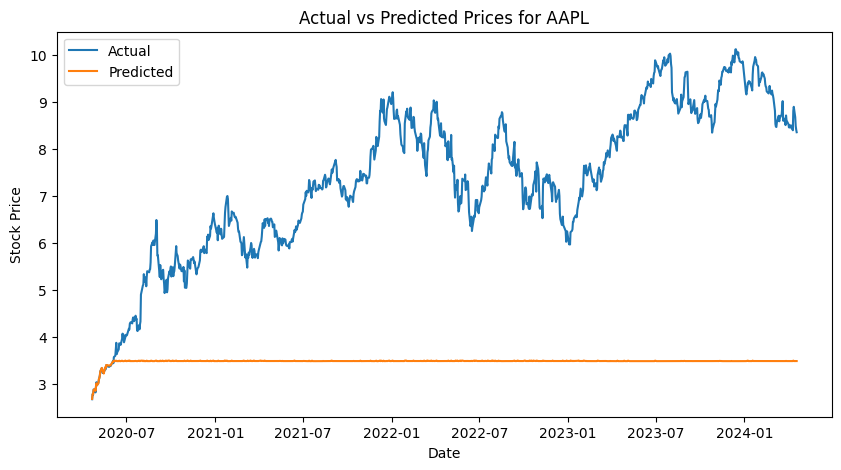

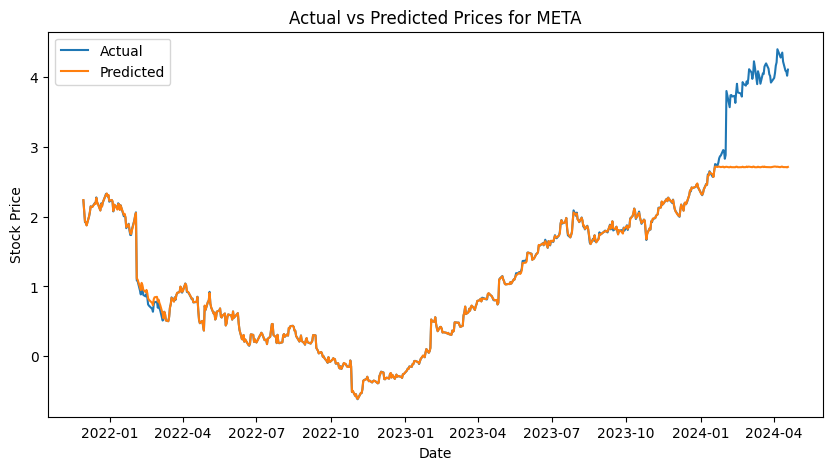

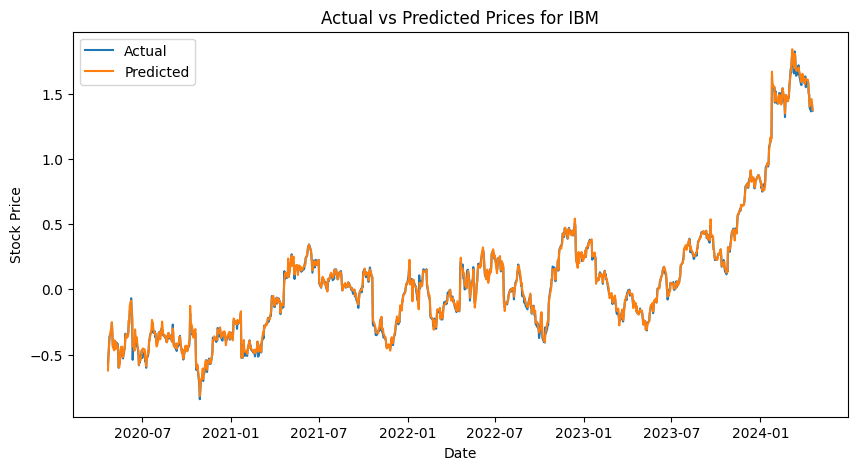

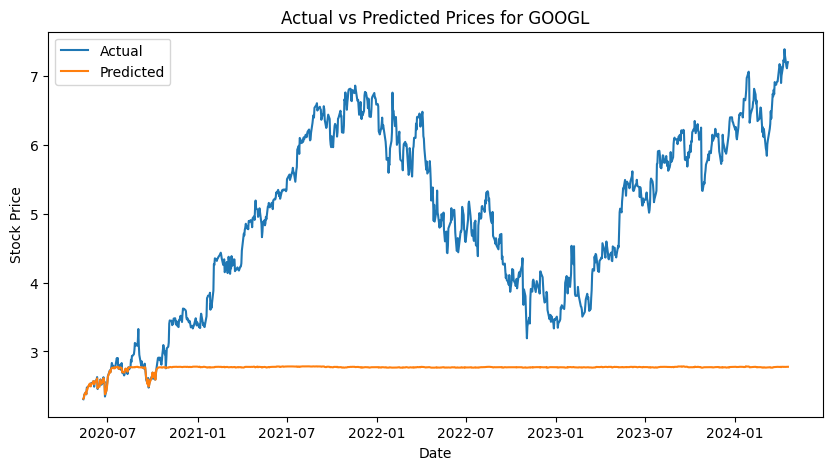

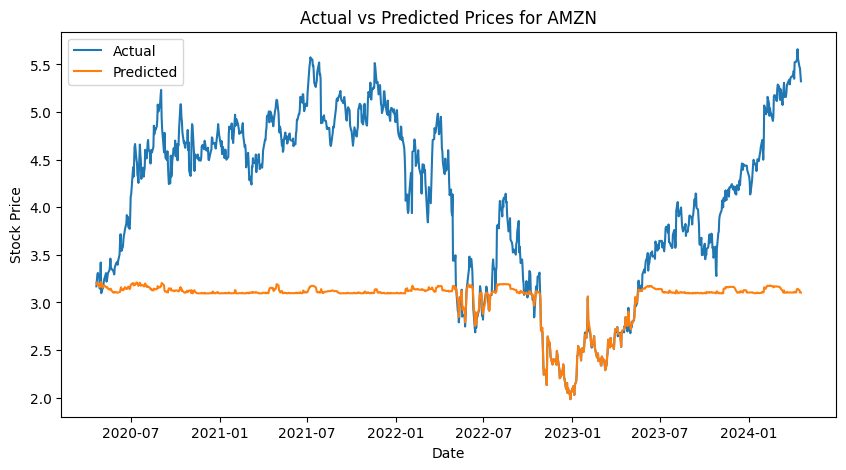

In [ ]:
import matplotlib.pyplot as plt

for name in predictions:
    plt.figure(figsize=(10, 5))
    plt.plot(test_data[name]['Date'], test_data[name]['Close'], label='Actual')
    plt.plot(test_data[name]['Date'], predictions[name], label='Predicted')
    plt.title(f"Actual vs Predicted Prices for {name}")
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import random
import sys

class TradingEnvironment:
    def __init__(self, data, n_states=50):
        self.data = data
        self.n_states = n_states
        self.current_step = 0
        self.initial_cash_in_hand = 10000
        self.cash_in_hand = self.initial_cash_in_hand
        self.holdings = 0
        self.current_price = 0

    def reset(self):
        self.current_step = 0
        self.cash_in_hand = self.initial_cash_in_hand
        self.holdings = 0
        self.current_price = self.data.iloc[self.current_step]['Close']
        return self._discretize_state(self.current_price)

    def _discretize_state(self, price):
        cut_points = np.linspace(self.data['Close'].min(), self.data['Close'].max(), self.n_states + 1)[1:-1]
        state = np.digitize(price, cut_points)
        return state


    def step(self, action):
        self.current_price = self.data.iloc[self.current_step]['Close']
        reward = 0
        done = False

        if action == 0:  # buy
            num_shares_can_buy = int(self.cash_in_hand / self.current_price)
            if num_shares_can_buy > 0:
                self.holdings += num_shares_can_buy
                self.cash_in_hand -= num_shares_can_buy * self.current_price
                reward = -num_shares_can_buy  # Cost for buying shares
        elif action == 1 and self.holdings > 0:  # sell
            self.cash_in_hand += self.holdings * self.current_price
            reward = self.holdings  # Profit from selling shares
            self.holdings = 0

        # Update total reward
        total_portfolio_value = self.cash_in_hand + self.holdings * self.current_price
        reward += total_portfolio_value - self.initial_cash_in_hand

        # Move to the next day
        self.current_step += 1
        if self.current_step >= len(self.data) - 1:
            done = True

        # Discretize the new state
        next_state = self._discretize_state(self.data.iloc[self.current_step]['Close'])

        return next_state, reward, done

class QLearningTrader:
    def __init__(self, n_states, n_actions, learning_rate=0.01, discount_factor=0.95, exploration_rate=1.0, exploration_decay=0.995):
        self.n_states = n_states
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.q_table = np.zeros((n_states, n_actions))

    def act(self, state):
        if np.random.rand() < self.exploration_rate:
            return random.randrange(self.n_actions)
        return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state, done):
        old_value = self.q_table[state, action]
        next_max = np.max(self.q_table[next_state])
        new_value = (1 - self.learning_rate) * old_value + self.learning_rate * (reward + self.discount_factor * next_max * (not done))
        self.q_table[state, action] = new_value
        if done:
            self.exploration_rate *= self.exploration_decay

def train_trading_agent(env, trader, epochs=1000):
    for epoch in range(epochs):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = trader.act(state)
            next_state, reward, done = env.step(action)
            trader.learn(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
        print(f'Epoch {epoch+1}/{epochs} - Total Reward: {total_reward}')
        if trader.exploration_rate > trader.exploration_decay:
            trader.exploration_rate *= trader.exploration_decay

def evaluate_performance(env, trader, num_episodes=100):
    returns = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = trader.act(state)
            next_state, reward, done = env.step(action)
            state = next_state
            total_reward += reward
        returns.append(total_reward)
    returns = np.array(returns)
    mean_return = np.mean(returns)
    std_return = np.std(returns)
    max_return = np.max(returns)
    min_return = np.min(returns)
    risk_free_rate = 0.02  # Assumed risk-free rate (you can change it)
    sharpe_ratio = (mean_return - risk_free_rate) / std_return
    return mean_return, std_return, max_return, min_return, sharpe_ratio

import sys

# ... [rest of your class definitions for TradingEnvironment and QLearningTrader] ...

def main():
    file_path = '/content/drive/My Drive/Colab Notebooks/META_data (1).csv'  # Replace with your file path
    historical_data = pd.read_csv(file_path)
    n_states = 50  # Set the number of discrete states for price
    env = TradingEnvironment(historical_data, n_states)
    n_actions = 3  # buy, sell, hold
    trader = QLearningTrader(n_states, n_actions)

    # Train the trading agent
    train_trading_agent(env, trader, epochs=500)

    # Save the Q-table for future use
    np.save('meta_q_table.npy', trader.q_table)

    # Print the Q-table to check what the agent has learned
    print("\nPredicted Q-table:")
    print(trader.q_table)
    sys.stdout.flush()  # Ensure that the output is printed before taking input

    # Evaluate the performance of the agent
    mean_return, std_return, max_return, min_return, sharpe_ratio = evaluate_performance(env, trader)
    print("\nPerformance Evaluation:")
    print(f"Mean Return: {mean_return}")
    print(f"Standard Deviation of Return: {std_return}")
    print(f"Maximum Return: {max_return}")
    print(f"Minimum Return: {min_return}")
    print(f"Sharpe Ratio: {sharpe_ratio}")
    sys.stdout.flush()  # Flush the output here as well

    # Interpretation of the Q-table for actions
    print("\nLearned Policy by State:")
    for state in range(n_states):
        action = np.argmax(trader.q_table[state])
        action_name = ['Buy', 'Sell', 'Hold'][action]
        print(f"State {state}: {action_name}")
    sys.stdout.flush()  # Flush the output here too

    # User input for trading advice
    while True:
        print("\nReady to provide trading advice. Enter 'quit' to exit.")
        sys.stdout.flush()  # Flush to make sure this print is shown before input
        user_input = input("Enter the current stock price: ")

        if user_input.lower() == 'quit':
            print("Exiting trading advice tool.")
            break  # Break the loop to exit
        else:
            try:
                # Process the user input and provide advice
                current_price = float(user_input)
                state = env._discretize_state(current_price)
                action = np.argmax(trader.q_table[state])
                action_name = ['Buy', 'Sell', 'Hold'][action]
                print(f"Advice: {action_name}")
            except ValueError:
                # Handle invalid input
                print("Invalid input. Please enter a valid stock price.")

            sys.stdout.flush()  # Flush after each interaction

if __name__ == "__main__":
    main()


Epoch 1/500 - Total Reward: 15382809.103170393
Epoch 2/500 - Total Reward: 25137212.451869965
Epoch 3/500 - Total Reward: 25437470.813531876
Epoch 4/500 - Total Reward: 35966130.05394173
Epoch 5/500 - Total Reward: 109528203.60137558
Epoch 6/500 - Total Reward: 14019280.198173527
Epoch 7/500 - Total Reward: 40590944.52376748
Epoch 8/500 - Total Reward: 8715032.410207748
Epoch 9/500 - Total Reward: 9443629.175605776
Epoch 10/500 - Total Reward: 53075994.24870873
Epoch 11/500 - Total Reward: 57107506.464515686
Epoch 12/500 - Total Reward: 77506232.78005601
Epoch 13/500 - Total Reward: 563771.0812892937
Epoch 14/500 - Total Reward: 133789019.37075233
Epoch 15/500 - Total Reward: 38929366.49333763
Epoch 16/500 - Total Reward: 23544486.818391796
Epoch 17/500 - Total Reward: 21148386.797723774
Epoch 18/500 - Total Reward: 72848600.81562424
Epoch 19/500 - Total Reward: 88136127.56973457
Epoch 20/500 - Total Reward: 60090859.23052598
Epoch 21/500 - Total Reward: 22050632.02345085
Epoch 22/500 

In [6]:
import numpy as np
import pandas as pd
import random
import sys

class TradingEnvironment:
    def __init__(self, data, n_states=50):
        self.data = data
        self.n_states = n_states
        self.current_step = 0
        self.initial_cash_in_hand = 10000
        self.cash_in_hand = self.initial_cash_in_hand
        self.holdings = 0
        self.current_price = 0

    def reset(self):
        self.current_step = 0
        self.cash_in_hand = self.initial_cash_in_hand
        self.holdings = 0
        self.current_price = self.data.iloc[self.current_step]['Close']
        return self._discretize_state(self.current_price)

    def _discretize_state(self, price):
        cut_points = np.linspace(self.data['Close'].min(), self.data['Close'].max(), self.n_states + 1)[1:-1]
        state = np.digitize(price, cut_points)
        return state


    def step(self, action):
        self.current_price = self.data.iloc[self.current_step]['Close']
        reward = 0
        done = False

        if action == 0:  # buy
            num_shares_can_buy = int(self.cash_in_hand / self.current_price)
            if num_shares_can_buy > 0:
                self.holdings += num_shares_can_buy
                self.cash_in_hand -= num_shares_can_buy * self.current_price
                reward = -num_shares_can_buy  # Cost for buying shares
        elif action == 1 and self.holdings > 0:  # sell
            self.cash_in_hand += self.holdings * self.current_price
            reward = self.holdings  # Profit from selling shares
            self.holdings = 0

        # Update total reward
        total_portfolio_value = self.cash_in_hand + self.holdings * self.current_price
        reward += total_portfolio_value - self.initial_cash_in_hand

        # Move to the next day
        self.current_step += 1
        if self.current_step >= len(self.data) - 1:
            done = True

        # Discretize the new state
        next_state = self._discretize_state(self.data.iloc[self.current_step]['Close'])

        return next_state, reward, done

class QLearningTrader:
    def __init__(self, n_states, n_actions, learning_rate=0.01, discount_factor=0.95, exploration_rate=1.0, exploration_decay=0.995):
        self.n_states = n_states
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.q_table = np.zeros((n_states, n_actions))

    def act(self, state):
        if np.random.rand() < self.exploration_rate:
            return random.randrange(self.n_actions)
        return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state, done):
        old_value = self.q_table[state, action]
        next_max = np.max(self.q_table[next_state])
        new_value = (1 - self.learning_rate) * old_value + self.learning_rate * (reward + self.discount_factor * next_max * (not done))
        self.q_table[state, action] = new_value
        if done:
            self.exploration_rate *= self.exploration_decay

def train_trading_agent(env, trader, epochs=1000):
    for epoch in range(epochs):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = trader.act(state)
            next_state, reward, done = env.step(action)
            trader.learn(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
        print(f'Epoch {epoch+1}/{epochs} - Total Reward: {total_reward}')
        if trader.exploration_rate > trader.exploration_decay:
            trader.exploration_rate *= trader.exploration_decay

def evaluate_performance(env, trader, num_episodes=100):
    returns = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = trader.act(state)
            next_state, reward, done = env.step(action)
            state = next_state
            total_reward += reward
        returns.append(total_reward)
    returns = np.array(returns)
    mean_return = np.mean(returns)
    std_return = np.std(returns)
    max_return = np.max(returns)
    min_return = np.min(returns)
    risk_free_rate = 0.02  # Assumed risk-free rate (you can change it)
    sharpe_ratio = (mean_return - risk_free_rate) / std_return
    return mean_return, std_return, max_return, min_return, sharpe_ratio

import sys

# ... [rest of your class definitions for TradingEnvironment and QLearningTrader] ...

def main():
    file_path = '/content/drive/My Drive/Colab Notebooks/GOOGLE.csv'  # Replace with your file path
    historical_data = pd.read_csv(file_path)
    n_states = 50  # Set the number of discrete states for price
    env = TradingEnvironment(historical_data, n_states)
    n_actions = 3  # buy, sell, hold
    trader = QLearningTrader(n_states, n_actions)

    # Train the trading agent
    train_trading_agent(env, trader, epochs=500)

    # Save the Q-table for future use
    np.save('google_q_table.npy', trader.q_table)

    # Print the Q-table to check what the agent has learned
    print("\nPredicted Q-table:")
    print(trader.q_table)
    sys.stdout.flush()  # Ensure that the output is printed before taking input

    # Evaluate the performance of the agent
    mean_return, std_return, max_return, min_return, sharpe_ratio = evaluate_performance(env, trader)
    print("\nPerformance Evaluation:")
    print(f"Mean Return: {mean_return}")
    print(f"Standard Deviation of Return: {std_return}")
    print(f"Maximum Return: {max_return}")
    print(f"Minimum Return: {min_return}")
    print(f"Sharpe Ratio: {sharpe_ratio}")
    sys.stdout.flush()  # Flush the output here as well

    # Interpretation of the Q-table for actions
    print("\nLearned Policy by State:")
    for state in range(n_states):
        action = np.argmax(trader.q_table[state])
        action_name = ['Buy', 'Sell', 'Hold'][action]
        print(f"State {state}: {action_name}")
    sys.stdout.flush()  # Flush the output here too

    # User input for trading advice
    while True:
        print("\nReady to provide trading advice. Enter 'quit' to exit.")
        sys.stdout.flush()  # Flush to make sure this print is shown before input
        user_input = input("Enter the current stock price: ")

        if user_input.lower() == 'quit':
            print("Exiting trading advice tool.")
            break  # Break the loop to exit
        else:
            try:
                # Process the user input and provide advice
                current_price = float(user_input)
                state = env._discretize_state(current_price)
                action = np.argmax(trader.q_table[state])
                action_name = ['Buy', 'Sell', 'Hold'][action]
                print(f"Advice: {action_name}")
            except ValueError:
                # Handle invalid input
                print("Invalid input. Please enter a valid stock price.")

            sys.stdout.flush()  # Flush after each interaction

if __name__ == "__main__":
    main()


Epoch 1/500 - Total Reward: -11241717.659764027
Epoch 2/500 - Total Reward: -5037563.511721057
Epoch 3/500 - Total Reward: -7946731.407771039
Epoch 4/500 - Total Reward: 10635464.267672908
Epoch 5/500 - Total Reward: -9873148.754770052
Epoch 6/500 - Total Reward: -5326714.220119054
Epoch 7/500 - Total Reward: 15330020.548263086
Epoch 8/500 - Total Reward: 18192474.385484044
Epoch 9/500 - Total Reward: -9286839.411877012
Epoch 10/500 - Total Reward: 12342034.544218015
Epoch 11/500 - Total Reward: -4290115.087381057
Epoch 12/500 - Total Reward: 9933405.74132697
Epoch 13/500 - Total Reward: 10121117.748919994
Epoch 14/500 - Total Reward: 4292523.952218949
Epoch 15/500 - Total Reward: -6721051.31577998
Epoch 16/500 - Total Reward: 17542130.428945977
Epoch 17/500 - Total Reward: -8527121.479511043
Epoch 18/500 - Total Reward: 4353041.982014006
Epoch 19/500 - Total Reward: 301365.7887740431
Epoch 20/500 - Total Reward: -9508278.998431021
Epoch 21/500 - Total Reward: 14894992.126074925
Epoch 

In [7]:
import numpy as np
import pandas as pd
import random
import sys

class TradingEnvironment:
    def __init__(self, data, n_states=50):
        self.data = data
        self.n_states = n_states
        self.current_step = 0
        self.initial_cash_in_hand = 10000
        self.cash_in_hand = self.initial_cash_in_hand
        self.holdings = 0
        self.current_price = 0

    def reset(self):
        self.current_step = 0
        self.cash_in_hand = self.initial_cash_in_hand
        self.holdings = 0
        self.current_price = self.data.iloc[self.current_step]['Close']
        return self._discretize_state(self.current_price)

    def _discretize_state(self, price):
        cut_points = np.linspace(self.data['Close'].min(), self.data['Close'].max(), self.n_states + 1)[1:-1]
        state = np.digitize(price, cut_points)
        return state


    def step(self, action):
        self.current_price = self.data.iloc[self.current_step]['Close']
        reward = 0
        done = False

        if action == 0:  # buy
            num_shares_can_buy = int(self.cash_in_hand / self.current_price)
            if num_shares_can_buy > 0:
                self.holdings += num_shares_can_buy
                self.cash_in_hand -= num_shares_can_buy * self.current_price
                reward = -num_shares_can_buy  # Cost for buying shares
        elif action == 1 and self.holdings > 0:  # sell
            self.cash_in_hand += self.holdings * self.current_price
            reward = self.holdings  # Profit from selling shares
            self.holdings = 0

        # Update total reward
        total_portfolio_value = self.cash_in_hand + self.holdings * self.current_price
        reward += total_portfolio_value - self.initial_cash_in_hand

        # Move to the next day
        self.current_step += 1
        if self.current_step >= len(self.data) - 1:
            done = True

        # Discretize the new state
        next_state = self._discretize_state(self.data.iloc[self.current_step]['Close'])

        return next_state, reward, done

class QLearningTrader:
    def __init__(self, n_states, n_actions, learning_rate=0.01, discount_factor=0.95, exploration_rate=1.0, exploration_decay=0.995):
        self.n_states = n_states
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.q_table = np.zeros((n_states, n_actions))

    def act(self, state):
        if np.random.rand() < self.exploration_rate:
            return random.randrange(self.n_actions)
        return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state, done):
        old_value = self.q_table[state, action]
        next_max = np.max(self.q_table[next_state])
        new_value = (1 - self.learning_rate) * old_value + self.learning_rate * (reward + self.discount_factor * next_max * (not done))
        self.q_table[state, action] = new_value
        if done:
            self.exploration_rate *= self.exploration_decay

def train_trading_agent(env, trader, epochs=1000):
    for epoch in range(epochs):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = trader.act(state)
            next_state, reward, done = env.step(action)
            trader.learn(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
        print(f'Epoch {epoch+1}/{epochs} - Total Reward: {total_reward}')
        if trader.exploration_rate > trader.exploration_decay:
            trader.exploration_rate *= trader.exploration_decay

def evaluate_performance(env, trader, num_episodes=100):
    returns = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = trader.act(state)
            next_state, reward, done = env.step(action)
            state = next_state
            total_reward += reward
        returns.append(total_reward)
    returns = np.array(returns)
    mean_return = np.mean(returns)
    std_return = np.std(returns)
    max_return = np.max(returns)
    min_return = np.min(returns)
    risk_free_rate = 0.05  # Assumed risk-free rate (you can change it)
    sharpe_ratio = (mean_return - risk_free_rate) / std_return
    return mean_return, std_return, max_return, min_return, sharpe_ratio

import sys

# ... [rest of your class definitions for TradingEnvironment and QLearningTrader] ...

def main():
    file_path = '/content/drive/My Drive/Colab Notebooks/IBM_data (1).csv'  # Replace with your file path
    historical_data = pd.read_csv(file_path)
    n_states = 50  # Set the number of discrete states for price
    env = TradingEnvironment(historical_data, n_states)
    n_actions = 3  # buy, sell, hold
    trader = QLearningTrader(n_states, n_actions)

    # Train the trading agent
    train_trading_agent(env, trader, epochs=500)

    # Save the Q-table for future use
    np.save('ibm_q_table.npy', trader.q_table)

    # Print the Q-table to check what the agent has learned
    print("\nPredicted Q-table:")
    print(trader.q_table)
    sys.stdout.flush()  # Ensure that the output is printed before taking input

    # Evaluate the performance of the agent
    mean_return, std_return, max_return, min_return, sharpe_ratio = evaluate_performance(env, trader)
    print("\nPerformance Evaluation:")
    print(f"Mean Return: {mean_return}")
    print(f"Standard Deviation of Return: {std_return}")
    print(f"Maximum Return: {max_return}")
    print(f"Minimum Return: {min_return}")
    print(f"Sharpe Ratio: {sharpe_ratio}")
    sys.stdout.flush()  # Flush the output here as well

    # Interpretation of the Q-table for actions
    print("\nLearned Policy by State:")
    for state in range(n_states):
        action = np.argmax(trader.q_table[state])
        action_name = ['Buy', 'Sell', 'Hold'][action]
        print(f"State {state}: {action_name}")
    sys.stdout.flush()  # Flush the output here too

    # User input for trading advice
    while True:
        print("\nReady to provide trading advice. Enter 'quit' to exit.")
        sys.stdout.flush()  # Flush to make sure this print is shown before input
        user_input = input("Enter the current stock price: ")

        if user_input.lower() == 'quit':
            print("Exiting trading advice tool.")
            break  # Break the loop to exit
        else:
            try:
                # Process the user input and provide advice
                current_price = float(user_input)
                state = env._discretize_state(current_price)
                action = np.argmax(trader.q_table[state])
                action_name = ['Buy', 'Sell', 'Hold'][action]
                print(f"Advice: {action_name}")
            except ValueError:
                # Handle invalid input
                print("Invalid input. Please enter a valid stock price.")

            sys.stdout.flush()  # Flush after each interaction

if __name__ == "__main__":
    main()


Epoch 1/500 - Total Reward: 126051615.559433
Epoch 2/500 - Total Reward: 38522266.28456879
Epoch 3/500 - Total Reward: -5317232.473678593
Epoch 4/500 - Total Reward: -12043840.08191681
Epoch 5/500 - Total Reward: -1674306.2071838216
Epoch 6/500 - Total Reward: 28107681.13481903
Epoch 7/500 - Total Reward: 20025454.620727547
Epoch 8/500 - Total Reward: 24045101.16538238
Epoch 9/500 - Total Reward: -7511482.098426819
Epoch 10/500 - Total Reward: 29190048.69155121
Epoch 11/500 - Total Reward: -2580369.023582463
Epoch 12/500 - Total Reward: 19527975.76860809
Epoch 13/500 - Total Reward: 24791513.913017265
Epoch 14/500 - Total Reward: -4519141.74168396
Epoch 15/500 - Total Reward: 13341035.995948752
Epoch 16/500 - Total Reward: 25587617.468307495
Epoch 17/500 - Total Reward: -3593915.8381271507
Epoch 18/500 - Total Reward: 2332745.9495696984
Epoch 19/500 - Total Reward: 3729375.5793456994
Epoch 20/500 - Total Reward: 25825308.30910492
Epoch 21/500 - Total Reward: 37197186.238594055
Epoch 22

In [8]:
import numpy as np
import pandas as pd
import random
import sys

class TradingEnvironment:
    def __init__(self, data, n_states=50):
        self.data = data
        self.n_states = n_states
        self.current_step = 0
        self.initial_cash_in_hand = 10000
        self.cash_in_hand = self.initial_cash_in_hand
        self.holdings = 0
        self.current_price = 0

    def reset(self):
        self.current_step = 0
        self.cash_in_hand = self.initial_cash_in_hand
        self.holdings = 0
        self.current_price = self.data.iloc[self.current_step]['Close']
        return self._discretize_state(self.current_price)

    def _discretize_state(self, price):
        cut_points = np.linspace(self.data['Close'].min(), self.data['Close'].max(), self.n_states + 1)[1:-1]
        state = np.digitize(price, cut_points)
        return state


    def step(self, action):
        self.current_price = self.data.iloc[self.current_step]['Close']
        reward = 0
        done = False

        if action == 0:  # buy
            num_shares_can_buy = int(self.cash_in_hand / self.current_price)
            if num_shares_can_buy > 0:
                self.holdings += num_shares_can_buy
                self.cash_in_hand -= num_shares_can_buy * self.current_price
                reward = -num_shares_can_buy  # Cost for buying shares
        elif action == 1 and self.holdings > 0:  # sell
            self.cash_in_hand += self.holdings * self.current_price
            reward = self.holdings  # Profit from selling shares
            self.holdings = 0

        # Update total reward
        total_portfolio_value = self.cash_in_hand + self.holdings * self.current_price
        reward += total_portfolio_value - self.initial_cash_in_hand

        # Move to the next day
        self.current_step += 1
        if self.current_step >= len(self.data) - 1:
            done = True

        # Discretize the new state
        next_state = self._discretize_state(self.data.iloc[self.current_step]['Close'])

        return next_state, reward, done

class QLearningTrader:
    def __init__(self, n_states, n_actions, learning_rate=0.01, discount_factor=0.95, exploration_rate=1.0, exploration_decay=0.995):
        self.n_states = n_states
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.q_table = np.zeros((n_states, n_actions))

    def act(self, state):
        if np.random.rand() < self.exploration_rate:
            return random.randrange(self.n_actions)
        return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state, done):
        old_value = self.q_table[state, action]
        next_max = np.max(self.q_table[next_state])
        new_value = (1 - self.learning_rate) * old_value + self.learning_rate * (reward + self.discount_factor * next_max * (not done))
        self.q_table[state, action] = new_value
        if done:
            self.exploration_rate *= self.exploration_decay

def train_trading_agent(env, trader, epochs=1000):
    for epoch in range(epochs):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = trader.act(state)
            next_state, reward, done = env.step(action)
            trader.learn(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
        print(f'Epoch {epoch+1}/{epochs} - Total Reward: {total_reward}')
        if trader.exploration_rate > trader.exploration_decay:
            trader.exploration_rate *= trader.exploration_decay

def evaluate_performance(env, trader, num_episodes=100):
    returns = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = trader.act(state)
            next_state, reward, done = env.step(action)
            state = next_state
            total_reward += reward
        returns.append(total_reward)
    returns = np.array(returns)
    mean_return = np.mean(returns)
    std_return = np.std(returns)
    max_return = np.max(returns)
    min_return = np.min(returns)
    risk_free_rate = 0.05  # Assumed risk-free rate (you can change it)
    sharpe_ratio = (mean_return - risk_free_rate) / std_return
    return mean_return, std_return, max_return, min_return, sharpe_ratio

import sys

# ... [rest of your class definitions for TradingEnvironment and QLearningTrader] ...

def main():
    file_path = '/content/drive/My Drive/Colab Notebooks/AAPL_data.csv'  # Replace with your file path
    historical_data = pd.read_csv(file_path)
    n_states = 50  # Set the number of discrete states for price
    env = TradingEnvironment(historical_data, n_states)
    n_actions = 3  # buy, sell, hold
    trader = QLearningTrader(n_states, n_actions)

    # Train the trading agent
    train_trading_agent(env, trader, epochs=500)

    # Save the Q-table for future use
    np.save('apple_q_table.npy', trader.q_table)

    # Print the Q-table to check what the agent has learned
    print("\nPredicted Q-table:")
    print(trader.q_table)
    sys.stdout.flush()  # Ensure that the output is printed before taking input

    # Evaluate the performance of the agent
    mean_return, std_return, max_return, min_return, sharpe_ratio = evaluate_performance(env, trader)
    print("\nPerformance Evaluation:")
    print(f"Mean Return: {mean_return}")
    print(f"Standard Deviation of Return: {std_return}")
    print(f"Maximum Return: {max_return}")
    print(f"Minimum Return: {min_return}")
    print(f"Sharpe Ratio: {sharpe_ratio}")
    sys.stdout.flush()  # Flush the output here as well

    # Interpretation of the Q-table for actions
    print("\nLearned Policy by State:")
    for state in range(n_states):
        action = np.argmax(trader.q_table[state])
        action_name = ['Buy', 'Sell', 'Hold'][action]
        print(f"State {state}: {action_name}")
    sys.stdout.flush()  # Flush the output here too

    # User input for trading advice
    while True:
        print("\nReady to provide trading advice. Enter 'quit' to exit.")
        sys.stdout.flush()  # Flush to make sure this print is shown before input
        user_input = input("Enter the current stock price: ")

        if user_input.lower() == 'quit':
            print("Exiting trading advice tool.")
            break  # Break the loop to exit
        else:
            try:
                # Process the user input and provide advice
                current_price = float(user_input)
                state = env._discretize_state(current_price)
                action = np.argmax(trader.q_table[state])
                action_name = ['Buy', 'Sell', 'Hold'][action]
                print(f"Advice: {action_name}")
            except ValueError:
                # Handle invalid input
                print("Invalid input. Please enter a valid stock price.")

            sys.stdout.flush()  # Flush after each interaction

if __name__ == "__main__":
    main()


Epoch 1/500 - Total Reward: 2042337488.216124
Epoch 2/500 - Total Reward: 222181660.5391252
Epoch 3/500 - Total Reward: 453597955.1181443
Epoch 4/500 - Total Reward: 262919570.84063417
Epoch 5/500 - Total Reward: 509681773.18292046
Epoch 6/500 - Total Reward: 318495271.05746746
Epoch 7/500 - Total Reward: 97808034.13500902
Epoch 8/500 - Total Reward: 43684649.07542536
Epoch 9/500 - Total Reward: 429385402.5110479
Epoch 10/500 - Total Reward: 71267259.75138322
Epoch 11/500 - Total Reward: 439728097.27053165
Epoch 12/500 - Total Reward: 402825223.88795865
Epoch 13/500 - Total Reward: 114935594.35834783
Epoch 14/500 - Total Reward: 332436132.5302652
Epoch 15/500 - Total Reward: 241323238.1167288
Epoch 16/500 - Total Reward: 382197351.37996167
Epoch 17/500 - Total Reward: 212806959.69500896
Epoch 18/500 - Total Reward: 98106863.18275785
Epoch 19/500 - Total Reward: 181392946.0227472
Epoch 20/500 - Total Reward: 474782943.4992243
Epoch 21/500 - Total Reward: 451078061.7990775
Epoch 22/500 -

In [2]:
import numpy as np
import pandas as pd
import random
import sys

class TradingEnvironment:
    def __init__(self, data, n_states=50):
        self.data = data
        self.n_states = n_states
        self.current_step = 0
        self.initial_cash_in_hand = 10000
        self.cash_in_hand = self.initial_cash_in_hand
        self.holdings = 0
        self.current_price = 0

    def reset(self):
        self.current_step = 0
        self.cash_in_hand = self.initial_cash_in_hand
        self.holdings = 0
        self.current_price = self.data.iloc[self.current_step]['Close']
        return self._discretize_state(self.current_price)

    def _discretize_state(self, price):
        cut_points = np.linspace(self.data['Close'].min(), self.data['Close'].max(), self.n_states + 1)[1:-1]
        state = np.digitize(price, cut_points)
        return state


    def step(self, action):
        self.current_price = self.data.iloc[self.current_step]['Close']
        reward = 0
        done = False

        if action == 0:  # buy
            num_shares_can_buy = int(self.cash_in_hand / self.current_price)
            if num_shares_can_buy > 0:
                self.holdings += num_shares_can_buy
                self.cash_in_hand -= num_shares_can_buy * self.current_price
                reward = -num_shares_can_buy  # Cost for buying shares
        elif action == 1 and self.holdings > 0:  # sell
            self.cash_in_hand += self.holdings * self.current_price
            reward = self.holdings  # Profit from selling shares
            self.holdings = 0

        # Update total reward
        total_portfolio_value = self.cash_in_hand + self.holdings * self.current_price
        reward += total_portfolio_value - self.initial_cash_in_hand

        # Move to the next day
        self.current_step += 1
        if self.current_step >= len(self.data) - 1:
            done = True

        # Discretize the new state
        next_state = self._discretize_state(self.data.iloc[self.current_step]['Close'])

        return next_state, reward, done

class QLearningTrader:
    def __init__(self, n_states, n_actions, learning_rate=0.01, discount_factor=0.95, exploration_rate=1.0, exploration_decay=0.995):
        self.n_states = n_states
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.q_table = np.zeros((n_states, n_actions))

    def act(self, state):
        if np.random.rand() < self.exploration_rate:
            return random.randrange(self.n_actions)
        return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state, done):
        old_value = self.q_table[state, action]
        next_max = np.max(self.q_table[next_state])
        new_value = (1 - self.learning_rate) * old_value + self.learning_rate * (reward + self.discount_factor * next_max * (not done))
        self.q_table[state, action] = new_value
        if done:
            self.exploration_rate *= self.exploration_decay

def train_trading_agent(env, trader, epochs=1000):
    for epoch in range(epochs):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = trader.act(state)
            next_state, reward, done = env.step(action)
            trader.learn(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
        print(f'Epoch {epoch+1}/{epochs} - Total Reward: {total_reward}')
        if trader.exploration_rate > trader.exploration_decay:
            trader.exploration_rate *= trader.exploration_decay

def evaluate_performance(env, trader, num_episodes=100):
    returns = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = trader.act(state)
            next_state, reward, done = env.step(action)
            state = next_state
            total_reward += reward
        returns.append(total_reward)
    returns = np.array(returns)
    mean_return = np.mean(returns)
    std_return = np.std(returns)
    max_return = np.max(returns)
    min_return = np.min(returns)
    risk_free_rate = 0.05  # Assumed risk-free rate (you can change it)
    sharpe_ratio = (mean_return - risk_free_rate) / std_return
    return mean_return, std_return, max_return, min_return, sharpe_ratio

import sys

# ... [rest of your class definitions for TradingEnvironment and QLearningTrader] ...

def main():
    file_path = '/content/drive/My Drive/Colab Notebooks/AMZN_data.csv'  # Replace with your file path
    historical_data = pd.read_csv(file_path)
    n_states = 50  # Set the number of discrete states for price
    env = TradingEnvironment(historical_data, n_states)
    n_actions = 3  # buy, sell, hold
    trader = QLearningTrader(n_states, n_actions)

    # Train the trading agent
    train_trading_agent(env, trader, epochs=500)

    # Save the Q-table for future use
    np.save('amazon_q_table.npy', trader.q_table)

    # Print the Q-table to check what the agent has learned
    print("\nPredicted Q-table:")
    print(trader.q_table)
    sys.stdout.flush()  # Ensure that the output is printed before taking input

    # Evaluate the performance of the agent
    mean_return, std_return, max_return, min_return, sharpe_ratio = evaluate_performance(env, trader)
    print("\nPerformance Evaluation:")
    print(f"Mean Return: {mean_return}")
    print(f"Standard Deviation of Return: {std_return}")
    print(f"Maximum Return: {max_return}")
    print(f"Minimum Return: {min_return}")
    print(f"Sharpe Ratio: {sharpe_ratio}")
    sys.stdout.flush()  # Flush the output here as well

    # Interpretation of the Q-table for actions
    print("\nLearned Policy by State:")
    for state in range(n_states):
        action = np.argmax(trader.q_table[state])
        action_name = ['Buy', 'Sell', 'Hold'][action]
        print(f"State {state}: {action_name}")
    sys.stdout.flush()  # Flush the output here too

    # User input for trading advice
    while True:
        print("\nReady to provide trading advice. Enter 'quit' to exit.")
        sys.stdout.flush()  # Flush to make sure this print is shown before input
        user_input = input("Enter the current stock price: ")

        if user_input.lower() == 'quit':
            print("Exiting trading advice tool.")
            break  # Break the loop to exit
        else:
            try:
                # Process the user input and provide advice
                current_price = float(user_input)
                state = env._discretize_state(current_price)
                action = np.argmax(trader.q_table[state])
                action_name = ['Buy', 'Sell', 'Hold'][action]
                print(f"Advice: {action_name}")
            except ValueError:
                # Handle invalid input
                print("Invalid input. Please enter a valid stock price.")

            sys.stdout.flush()  # Flush after each interaction

if __name__ == "__main__":
    main()


Epoch 1/500 - Total Reward: 74682463.80278897
Epoch 2/500 - Total Reward: 161807368.6973189
Epoch 3/500 - Total Reward: 34268105.840237714
Epoch 4/500 - Total Reward: 482553864.80712086
Epoch 5/500 - Total Reward: 151744962.19139037
Epoch 6/500 - Total Reward: 151910088.06450868
Epoch 7/500 - Total Reward: 64482629.39771366
Epoch 8/500 - Total Reward: 35175281.50943649
Epoch 9/500 - Total Reward: 14570970.769798733
Epoch 10/500 - Total Reward: -11348521.641112091
Epoch 11/500 - Total Reward: 390496655.831633
Epoch 12/500 - Total Reward: 577532465.9189975
Epoch 13/500 - Total Reward: 126232008.70172799
Epoch 14/500 - Total Reward: 23580240.60659504
Epoch 15/500 - Total Reward: 122000850.37743485
Epoch 16/500 - Total Reward: 223934409.0344511
Epoch 17/500 - Total Reward: 45287439.09070719
Epoch 18/500 - Total Reward: 452197869.54803896
Epoch 19/500 - Total Reward: 141928575.87125146
Epoch 20/500 - Total Reward: 88345855.75984265
Epoch 21/500 - Total Reward: 102523655.0669341
Epoch 22/500